# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
     # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
    
#to know when the code is done running
print("Completed")
        

Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | klyuchi
Processing Record 3 of Set 1 | carquefou
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | thinadhoo
Processing Record 7 of Set 1 | parabel
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | xining
Processing Record 11 of Set 1 | ishigaki
Processing Record 12 of Set 1 | san policarpo
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | chongwe
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | bahia honda
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | isangel
Processing Record 20 of Set 1 | fairbanks
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | robe
Processing Record 24 of Set 1 | lua

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# First wer create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Then we create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [13]:
#check if there are any cities with humidity >100%
column = weather_df["Humidity"]
max_value = column.max()
max_value #we can see that there is at least one city with humidity 100%

100

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#  Get the indices of cities that have humidity over 100%.
index_label = weather_df[weather_df['Humidity']>=100].index.tolist() 
index_label
#there are 12 cities where humidity=100%

[39, 142, 186, 202, 203, 208, 259, 288, 329, 401, 488, 506]

In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data=weather_df.drop(labels=None, axis=0, index=[39,142, 186, 202, 203, 208, 259, 288, 329, 401, 488, 506],columns=None, level=None, inplace=False, errors='raise')
#check if the rows were dropped and we can see that 12 rows were dropped
print(clean_city_data.shape)

(559, 9)


In [25]:
#next, we double check we dropped the right rows, by checking if there are any cities left with humidity=100%:
column = clean_city_data["Humidity"]
max_value = column.max()
max_value
#the max humidity value is now 9%, so we can move on with our analysis

99

In [27]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv("city_weather.csv")

In [31]:
#look at the data
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,41,NZ,1594928227,88,-46.60,168.33,37.80,10.36
1,Klyuchi,58,RU,1594928227,78,52.27,79.17,67.42,12.28
2,Carquefou,20,FR,1594928227,64,47.30,-1.49,71.60,6.93
3,Ushuaia,0,AR,1594928140,90,-54.80,-68.30,33.80,3.36
4,Bredasdorp,0,ZA,1594928089,93,-34.53,20.04,46.40,3.36


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

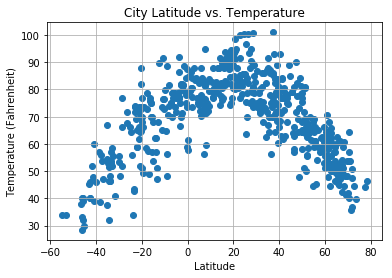

In [33]:
# Build a scatter plot for Latitude vs.Temperature 
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsTemperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

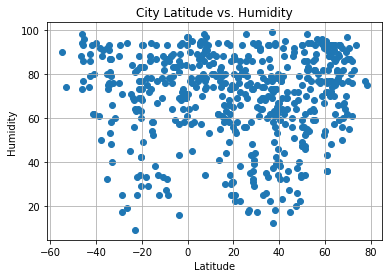

In [38]:
# Build a scatter plot for Latitude vs.Humidity
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

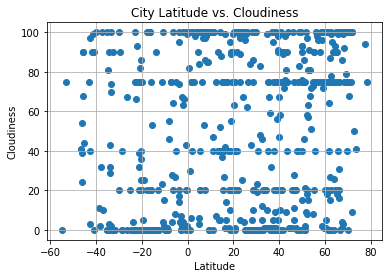

In [37]:
# Build a scatter plot for Latitude vs.Cloudiness
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsCloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

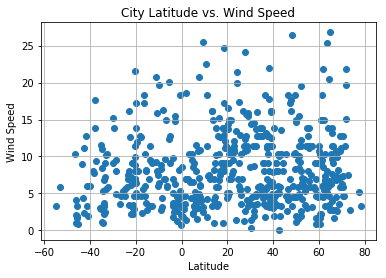

In [36]:
# Build a scatter plot for Latitude vs.Wind Speed
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression